In [1]:
%qtconsole

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
%matplotlib inline

import matplotlib.pyplot as plt
#from keras.optimizers import Adam

In [3]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial columns.
application_df.drop(columns=['EIN','NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'], inplace=True)

In [5]:
# Determine the number of unique values in each column.
# Generate our categorical variable list
application_unique = application_df.dtypes.index.tolist()
application_df[application_unique].nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

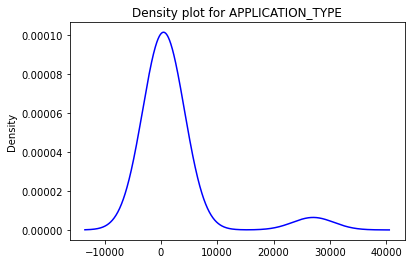

In [7]:
#application_df.APPLICATION_TYPE.plot
application_type_counts.plot.density(color='blue', legend=False)
plt.title('Density plot for APPLICATION_TYPE')
plt.show()

In [8]:
# Determine which values to replace if counts are less than 500?
replace_application = list(application_type_counts[application_type_counts < 750].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()

# Check the number of unique values in each column
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

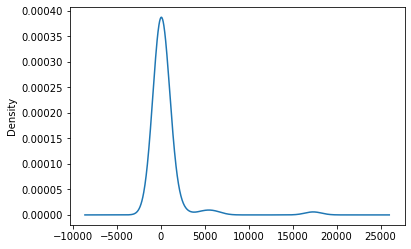

In [10]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than 1000?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE    6
AFFILIATION         6
CLASSIFICATION      6
USE_CASE            5
ORGANIZATION        4
INCOME_AMT          9
dtype: int64

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,axis=1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,  stratify=y)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
X_scaler_ = scaler.fit(X_test)
X_test_scaled = X_scaler_.transform(X_test)

In [18]:
len(X_train_scaled[0])

37

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  74
hidden_nodes_layer2 = 37
hidden_nodes_layer3 = 18
hidden_nodes_layer4 = 9
hidden_nodes_layer5 = 4
hidden_nodes_layer6 = 2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="ReLU")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="ReLU"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="ReLU"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="ReLU"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="ReLU"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="ReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 74)                2812      
_________________________________________________________________
dense_1 (Dense)              (None, 37)                2775      
_________________________________________________________________
dense_2 (Dense)              (None, 18)                684       
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#optimizer=Adam(lr=0.001)

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.7087
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5716 - accuracy: 0.7308
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5631 - accuracy: 0.7312
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5602 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5568 - accuracy: 0.7327
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7338
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7336: 0s - loss: 0.5551 - accuracy: 
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5519 - accuracy: 0.7347: 0s - loss: 0.5542 - accura
Epoch 10/100
804/804 [=========

804/804 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy: 0.7392
Epoch 78/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5405 - accuracy: 0.7391
Epoch 79/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5398 - accuracy: 0.7390: 0s - loss: 0.5369 - accu
Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5400 - accuracy: 0.7404
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5401 - accuracy: 0.7397
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5403 - accuracy: 0.7402
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5400 - accuracy: 0.7394
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5399 - accuracy: 0.7391
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5401 - accuracy: 0.7395
Epoch 86/100
804/804 [==============================] - 1s 1ms/step -

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5631 - accuracy: 0.7271
Loss: 0.5630587339401245, Accuracy: 0.7271137237548828
